In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

from tools import generate_input
from models import ContinuousReverseGame, ContinuousGameOfLife

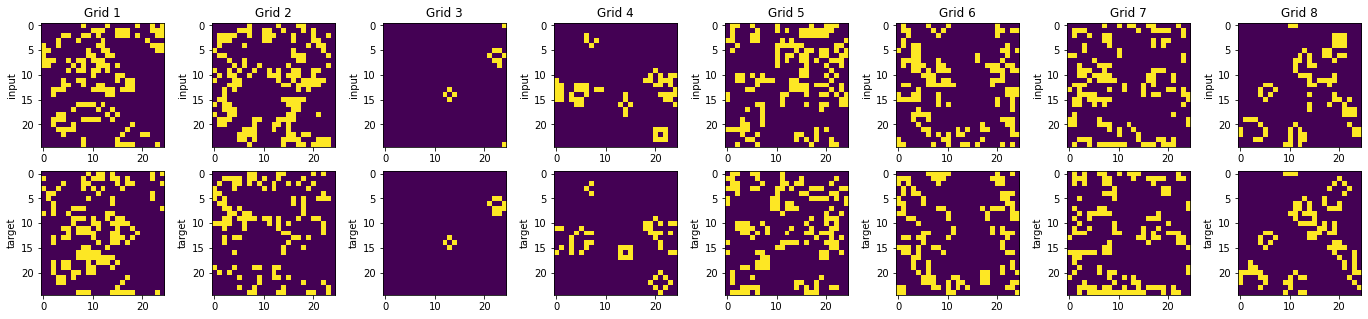

In [2]:
# generating some inputs and targets for the general mode

x, y = generate_input(trials=8, grid_shape=(25,25),steps_before_generating_output=5)


plt.figure(figsize=(3*len(x), 5))
for i in range(len(x)):
    plt.subplot(2, len(x), i+1)
    plt.title('Grid ' + str(i+1))
    plt.imshow(x[i])
    plt.ylabel('input')
    plt.subplot(2, len(x), len(x)+i+1)
    plt.imshow(y[i])
    plt.ylabel('target')    

Defining _f_

In [15]:
def continuous_game(cell, around_cell, border=0.4):
    mask = tf.math.less(cell, 0.5)

# TODO use tf.where
    left_values = continuous_game_left(cell, around_cell)
    right_values = continuous_game_right(cell, around_cell)

    
    return x

def continuous_game_left(cell, around_cell, border):
    base_plane = cell 

    x = (3+border-around_cell)/border
    part_1 = (1 - 2*x)*cell + x 

    a = tf.math.maximum(base_plane, part_1)

    y = (around_cell-(3-border))/border 
    part_2 = (1 - 2*y)*cell + y
    b = tf.math.maximum(base_plane, part_2)

    xx = tf.math.minimum(a,b)
    return xx

def continuous_game_right(cell, around_cell, border):

    base_plane = 1 - cell 

    top_plane = cell

    x = (3+border-around_cell)/border
    part_1 = (1 - 2*x)*(1-cell) + x 

    a = tf.math.maximum(base_plane, part_1)

    y = (around_cell-(2-border))/border 
    part_2 = (1 - 2*y)*(1-cell) + y
    b = tf.math.maximum(base_plane, part_2)

    xx = tf.math.minimum(top_plane,a)
    xx = tf.math.minimum(xx, b)
    return xx



In [16]:
# quadratic version

# base_plane = - 2*(cell-0.5)**2 + 0.5
    
# x = (3+border-around_cell)/border
# part_1 = 2*x*(cell - 0.5)**2 + 0.5    
# xx = tf.math.maximum(part_1, base_plane)
    

Plotting _f_

In [17]:
around_cell_possible_values = np.arange(0, 8.00001, 0.02)
cell_possible_values = np.arange(1.0000, -0.0000001,-0.01)

around_cell = [list(around_cell_possible_values)]*len(cell_possible_values)
cell = [list(cell_possible_values)] * len(around_cell_possible_values)

around_cell = np.array(around_cell)
cell = np.array(cell)
cell = np.transpose(cell)

around_cell = tf.constant(around_cell)
cell = tf.constant(cell)

xx = continuous_game(cell, around_cell)

plt.figure(figsize=(10,4))
plt.imshow(xx, vmin=0, vmax=1)

plt.xticks([0, 101, 201, 301, 401], [0,2,4,6, 8])
plt.yticks([0,100], ['alive: 1', 'dead: 0'])
plt.ylabel('State of the cell')
plt.xlabel('Sum of the states of the cells around')

print('The colour indicates the state of the cell for the next step')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [27]:
@tf.function
def gradient_ascent_step(img, target, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss1(img, target)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # grads = tf.multiply(grads, mask)
    # Normalize gradients.
    grads_normed = tf.math.l2_normalize(grads)
    img.assign_sub(grads_normed*learning_rate)
    return loss, img, grads_normed

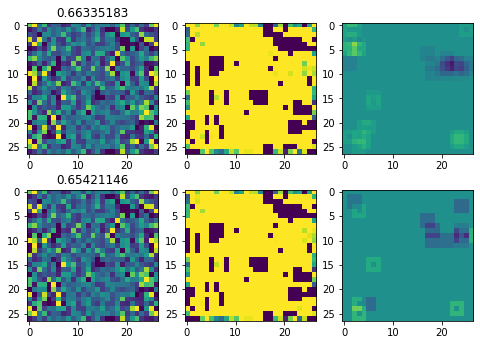

In [104]:
iterations = 2
plt.figure(figsize=(8, 3*4*iterations))


for i in range(200):
    loss, img , gr = gradient_ascent_step(img, y[1], 0.3)
    img = tf.Variable(img)

for i in range(iterations):
    loss, img , gr = gradient_ascent_step(img, y[1], 0.1)
    img = tf.Variable(img)
    plt.subplot(iterations*4,3, 3*i+1)
    plt.title(str(loss.numpy()))
    plt.imshow(img[0], vmin=0, vmax=1)
    plt.subplot(iterations*4, 3, 3*i+2)
    plt.imshow( game(img)[0], vmin=0, vmax=1)
    plt.subplot(iterations*4, 3, 3*i+3)
    plt.imshow( gr[0], vmin=-0.3, vmax=0.3)
        

    